# Линейная алгебра в контексте линейных методов. Часть 2

## Введение

### Задание 1.4
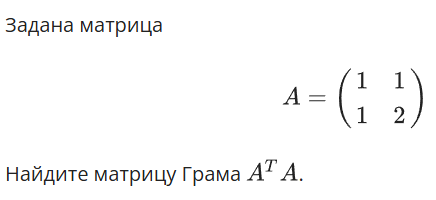

In [7]:
import numpy as np
import pandas as pd

In [8]:
A = np.matrix('1,1; 1,2')
print(A.T@A)

[[2 3]
 [3 5]]


### Задание 1.6
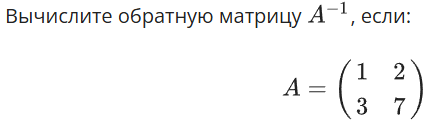

In [9]:
A = np.matrix('1,2; 3,7')
print(np.linalg.inv(A))

[[ 7. -2.]
 [-3.  1.]]


### Задание 1.7

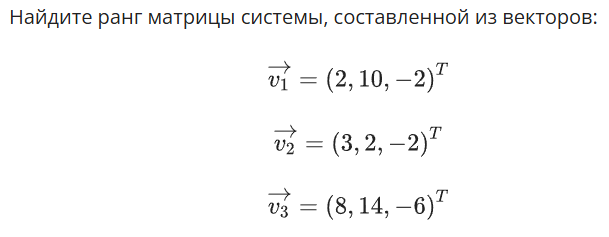

In [10]:
v1 = np.array([2,10,-2])
v2 = np.array([3,2,-2])
v3 = np.array([8,14,-6])

A = np.array([v1,v2,v3]).T

print(np.linalg.matrix_rank(A))

2


## Линейная регрессия по методу наименьших кадратов

In [16]:
# Решение задачи на Python

#Загружаем необходимые библиотеки

#Для работы с DataFrame
import pandas as pd
#Для работы с массивами
import numpy as np
#Для импорта данных
from sklearn import datasets
#Для визуализации статистических данных
import seaborn as sns
#Для построения графиков
import matplotlib.pyplot as plt

#Загружаем датасет
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 
                'RM', 'AGE', 'DIS', 'RAD', 'TAX', 
                'PTRATIO', 'B', 'LSTAT', 'PRICE']
boston_data = pd.read_csv('data/housing.csv',
                          header=None, delimiter=r'\s+', names=column_names)
display(boston_data.head())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [21]:
#Составляем матрицу А и вектор целевой переменной
CRIM = boston_data['CRIM']
RM = boston_data['RM']
A = np.column_stack((np.ones(506), CRIM, RM))
y = boston_data[['PRICE']]
print(A)
print(y)

[[1.0000e+00 6.3200e-03 6.5750e+00]
 [1.0000e+00 2.7310e-02 6.4210e+00]
 [1.0000e+00 2.7290e-02 7.1850e+00]
 ...
 [1.0000e+00 6.0760e-02 6.9760e+00]
 [1.0000e+00 1.0959e-01 6.7940e+00]
 [1.0000e+00 4.7410e-02 6.0300e+00]]
     PRICE
0     24.0
1     21.6
2     34.7
3     33.4
4     36.2
..     ...
501   22.4
502   20.6
503   23.9
504   22.0
505   11.9

[506 rows x 1 columns]


In [24]:
#Посмотрим на размерность матрицы А
print(A.shape)

(506, 3)


In [27]:
#Вычислим OLS-оценку для коэффициентов
w_hat = np.linalg.inv(A.T@A)@A.T@y
print(w_hat.values)

[[-29.24471945]
 [ -0.26491325]
 [  8.39106825]]


In [28]:
#Составим прогноз нашей модели

#Добавим новые данные
CRIM_new = 0.1
RM_new = 8
#Делаем прогноз типичной стоимости дома
PRICE_new = w_hat.iloc[0] + w_hat.iloc[1]*CRIM_new + w_hat.iloc[2]*RM_new
print(PRICE_new.values)

[37.85733519]


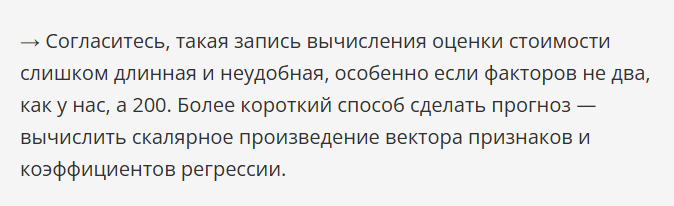

In [29]:
#Короткий способ сделать прогноз

#Оформим характеристики нового наблюдения в виде матрицы 
new= np.array([[1, CRIM_new, RM_new]])

print('prediction:', (new@w_hat).values)

prediction: [[37.85733519]]


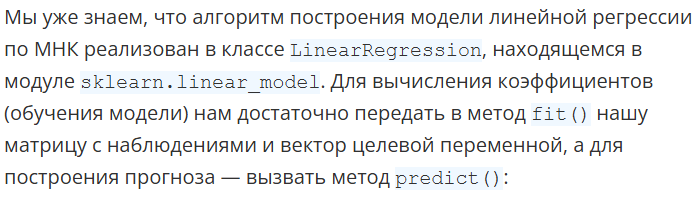

In [30]:
from sklearn.linear_model import LinearRegression

#Создаем модель линейной регрессии
model = LinearRegression(fit_intercept=False)

#Вычисляем коэффициенты регрессии
model.fit(A,y)
print('w_hat:', model.coef_)
new_prediction = model.predict(new)
print('prediction:', new_prediction)

w_hat: [[-29.24471945  -0.26491325   8.39106825]]
prediction: [[37.85733519]]


### Задание 3.5
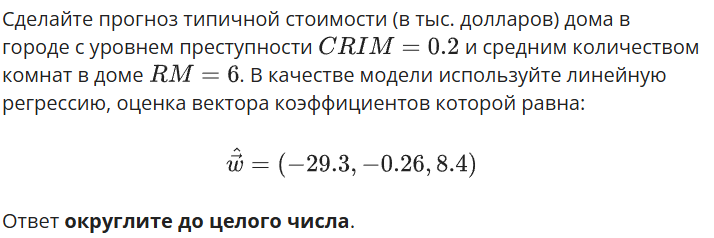

In [ ]:
CRIM_new = 0.2
RM_new = 6

new = np.array([[1, CRIM_new, RM_new]])
new_prediction = model.predict(new)
print('prediction:', new_prediction)

prediction: [[21.04870738]]


### Проблемы в классической МНК-модели

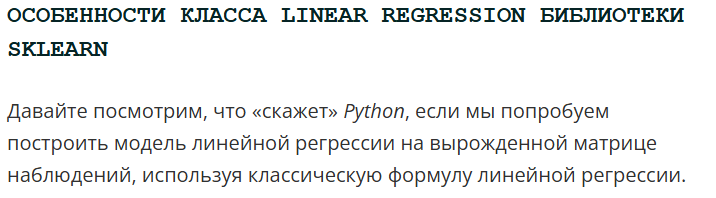

In [35]:
# Создадим вырожденную матрицу А

A = np.array([
    [1,1,1,1],
    [2,1,1,2],
    [-2,-1,-1,-2]]
).T
y=np.array([1,2,5,1])

#Вычислим OLS-оценку для коэффициентов
w_hat = np.linalg.inv(A.T@A)@A.T@y
print(w_hat)

LinAlgError: Singular matrix

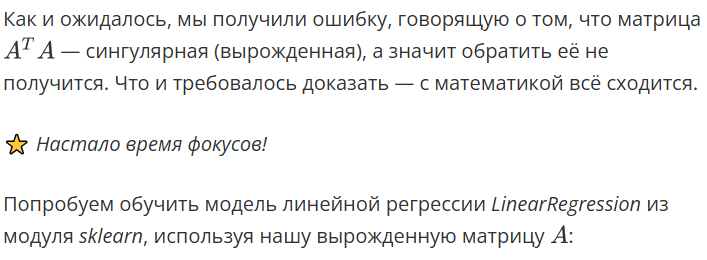

In [36]:
#Создаем модель линейной регрессии
model = LinearRegression(fit_intercept=False)
#Вычисляем коэффициенты регрессии
model.fit(A,y)
print('w_hat:', model.coef_)

w_hat: [ 6.   -1.25  1.25]


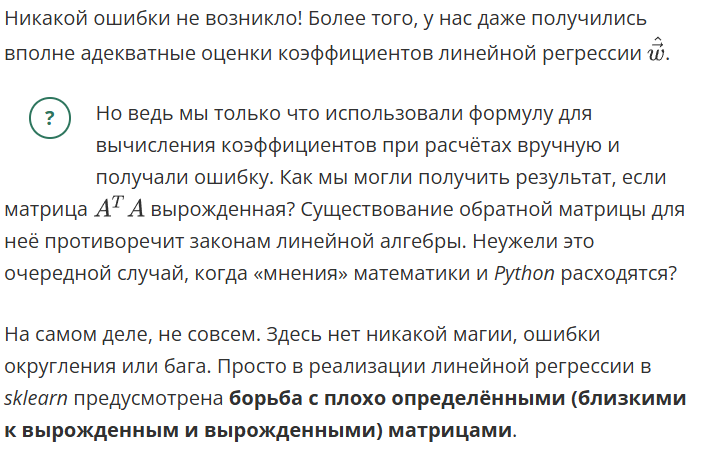

In [37]:
#Классическая OLS-регрессия в numpy с возможностью
#получения решения даже для вырожденных матриц
np.linalg.lstsq(A,y,rcond=None)

(array([ 6.  , -1.25,  1.25]),
 array([], dtype=float64),
 2,
 array([4.86435029, 0.58146041, 0.        ]))

In [38]:
A = np.array([[1,1,1,1],
              [1,1,0,2],
              [-1,1,0,0],
              [0,2,0,2]]
)

print(np.linalg.det(A))

0.0


## Стандартизация векторов и матрица корреляций

### Стандартизация векторов

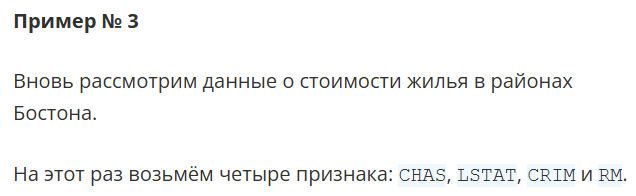

In [39]:
#Посмотрим на статистические характеристики с помощью метода describe()
boston_data[['CHAS', 'LSTAT', 'CRIM', 'RM']].describe()

,CHAS,LSTAT,CRIM,RM
count,506.000000,506.000000,506.000000,506.000000
mean,0.069170,12.653063,3.613524,6.284634
std,0.253994,7.141062,8.601545,0.702617
min,0.000000,1.730000,0.006320,3.561000
25%,0.000000,6.950000,0.082045,5.885500
50%,0.000000,11.360000,0.256510,6.208500
75%,0.000000,16.955000,3.677083,6.623500
max,1.000000,37.970000,88.976200,8.780000


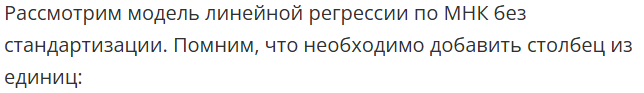

In [73]:
#Составляем таблицу наблюдений и вектор целевой переменной
A = np.column_stack((np.ones(506), boston_data[['CHAS', 'LSTAT', 'CRIM', 'RM']]))
y = boston_data[['PRICE']]

#Вычисляем OLS-оценку для коэффициентов без стандартизации
w_hat = np.linalg.inv(A.T@A)@A.T@y
print(w_hat.values)

[[-1.92052548]
 [ 3.9975594 ]
 [-0.58240212]
 [-0.09739445]
 [ 5.07554248]]


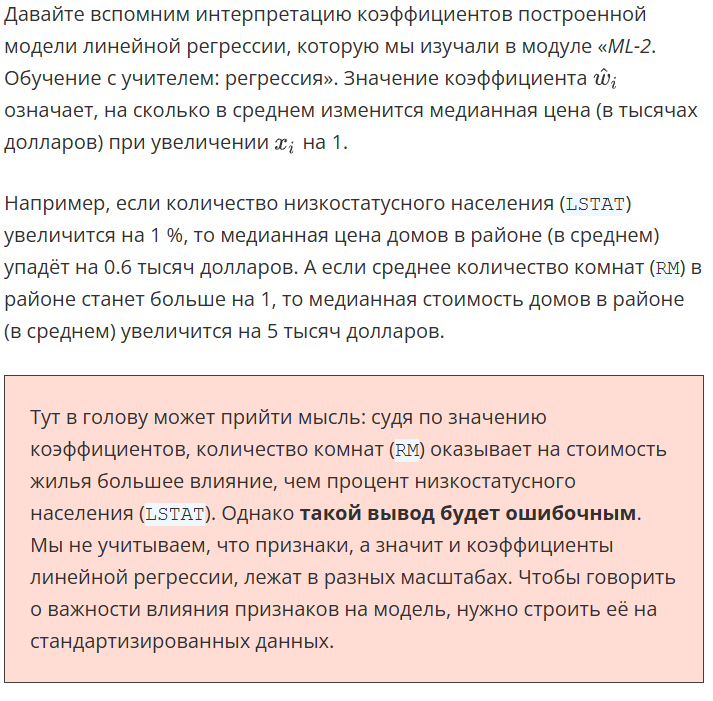

In [48]:
#Составляем матрицу наблюдений без дополнителного столбца из единиц
A = boston_data[['CHAS', 'LSTAT', 'CRIM', 'RM']]
y = boston_data[['PRICE']]
#Стандартизиоуем векторы в столбцах матрицы A
A_cent = A - A.mean(axis=0)
A_st = A_cent/np.linalg.norm(A_cent, axis=0)
A_st.describe().round(2)

,CHAS,LSTAT,CRIM,RM
count,506.00,506.00,506.00,506.00
mean,-0.00,-0.00,-0.00,-0.00
std,0.04,0.04,0.04,0.04
min,-0.01,-0.07,-0.02,-0.17
25%,-0.01,-0.04,-0.02,-0.03
50%,-0.01,-0.01,-0.02,-0.00
75%,-0.01,0.03,0.00,0.02
max,0.16,0.16,0.44,0.16


Теперь векторы имеют одинаковые средние значения и стандартные отклонения. Если вычислить длину каждого из векторов, мы увидим, что они будут равны 1

In [49]:
print(np.linalg.norm(A_st, axis=0))

[1. 1. 1. 1.]


Для получения стандартизированных коэффициентов нам также понадобится стандартизация целевой переменной  по тому же принципу

In [50]:
#Стандартизируем вектор целевой переменной
y_cent = y - y.mean()
y_st = y_cent/np.linalg.norm(y_cent)

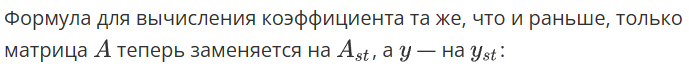

In [51]:
#Вычислим OLS-оценку для стандартизированных коэффициентов
w_hat_st = np.linalg.inv(A_st.T@A_st)@A_st.T@y_st
print(w_hat_st.values)

[[ 0.11039956]
 [-0.45220423]
 [-0.09108766]
 [ 0.38774848]]


Давайте поближе взглянем на матрицу Грама для стандартизированных факторов

In [53]:
#Матрица Грама
A_st.T@A_st

,CHAS,LSTAT,CRIM,RM
CHAS,1.000000,-0.053929,-0.055892,0.091251
LSTAT,-0.053929,1.000000,0.455621,-0.613808
CRIM,-0.055892,0.455621,1.000000,-0.219247
RM,0.091251,-0.613808,-0.219247,1.000000


### Задание 4.3
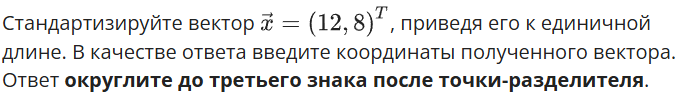

In [58]:
x = np.array([12,8])

x_cent = x - x.mean(axis=0)
x_st = x_cent/np.linalg.norm(x_cent, axis=0)
print(x_st)


[ 0.70710678 -0.70710678]


### Корреляционная матрица

In [59]:
#В NumPy матрица корреляций вычислсяется функцией np.corrcoef()

x_1 = np.array([1,2,6])
x_2 = np.array([3000,1000,2000])
np.corrcoef(x_1, x_2)

array([[ 1.        , -0.18898224],
       [-0.18898224,  1.        ]])

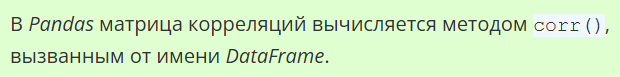

### Задание 4.7
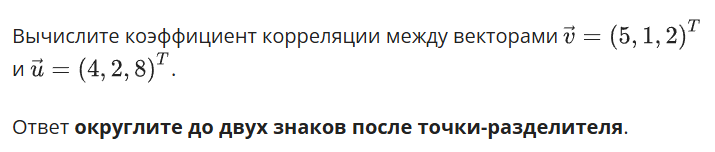

In [60]:
v = np.array([5,1,2])
u = np.array([4,2,8])
np.corrcoef(v,u)

array([[1.        , 0.05241424],
       [0.05241424, 1.        ]])

### Задание 4.8
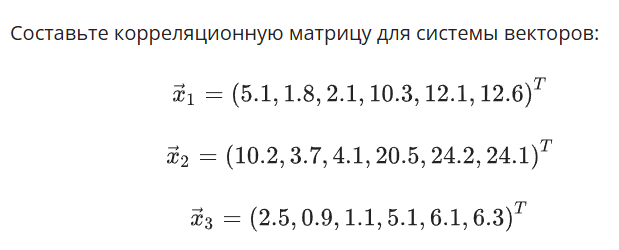

In [68]:
x_1 = np.array([5.1, 1.8, 2.1, 10.3, 12.1, 12.6])
x_2 = np.array([10.2, 3.7, 4.1, 20.5, 24.2, 24.1])
x_3 = np.array([2.5, 0.9, 1.1, 5.1, 6.1, 6.3])
df = pd.DataFrame({'x_1':[5.1, 1.8, 2.1, 10.3, 12.1, 12.6], 
                   'x_2':[10.2, 3.7, 4.1, 20.5, 24.2, 24.1],
                   'x_3': [2.5, 0.9, 1.1, 5.1, 6.1, 6.3]})
df_corr = df.corr()
df_corr_matrix = df_corr.values
display(df_corr)
display(df_corr_matrix)

,x_1,x_2,x_3
x_1,1.000000,0.999255,0.999837
x_2,0.999255,1.000000,0.999066
x_3,0.999837,0.999066,1.000000


array([[1.        , 0.99925473, 0.99983661],
       [0.99925473, 1.        , 0.99906626],
       [0.99983661, 0.99906626, 1.        ]])

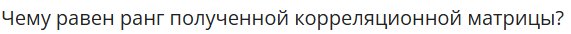

In [69]:
np.linalg.matrix_rank(df_corr_matrix)

3

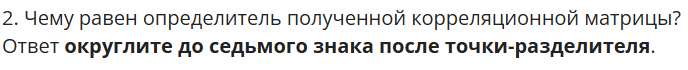

In [70]:
np.linalg.det(df_corr_matrix)

4.862298229242007e-07